# McDonalds helath review
### -Mario Krivosic-

In [11]:
#import necceseary libraries for extraction and reforming csv into database 
import pandas as pd
import kagglehub
import sqlite3
import matplotlib.pyplot
%matplotlib inline



In [27]:
#Get data from computer 
Mcdonalds_data = pd.read_csv(r"C:\\Users\mario\downloads\menu\menu.csv")
Mcdonalds_data.shape

(260, 24)

In [29]:
#Create conection to sqlite 3 for database creation and add McDonaldds to it
conn  = sqlite3.connect('Mcdonalds.db')
Mcdonalds_data.to_sql('Mcdonalds_nutrition', conn)

260

In [ ]:
#Utilise pandas to add it to a database for manipulation check first row
df = pd.read_sql("Select * from Mcdonalds_nutrition", conn)
df.head()

In [33]:
#Get simple data overview before diving in 
df.describe(include = 'all')


,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,NaN,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,129.500000,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,75.199734,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,129.500000,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,194.250000,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


# Begin assesment of sodium content in foods 

In [34]:
#Import graphical data base to find any visual trends and dig deeper \
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbs

c:\Users\mario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mario\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


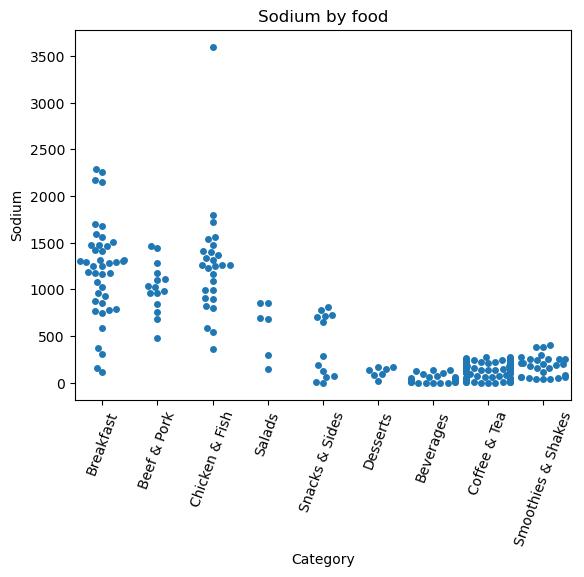

In [39]:
#create categorical scatterplot of the sodium contents in different foods 
plot = sbs.swarmplot(x="Category", y = 'Sodium', data=df)
plt.setp(plot.get_xticklabels(), rotation=70) #make sure lables are evenly spread
plt.title('Sodium by food')
plt.show()

### Finding max sodium items


In [40]:
#FInd max sodium present in dataset 
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [42]:
#Find coloumn with max sodium locatio
df['Sodium'].idxmax()

82

In [43]:
#FInd this coloumn to find the food item associated
df.loc[82, 'Item']

'Chicken McNuggets (40 piece)'

# Finding relationship betwen fat and protien 



Text(0.1, 0.9, 'Pearson r: 0.81\nP-value: 3.7e-61')

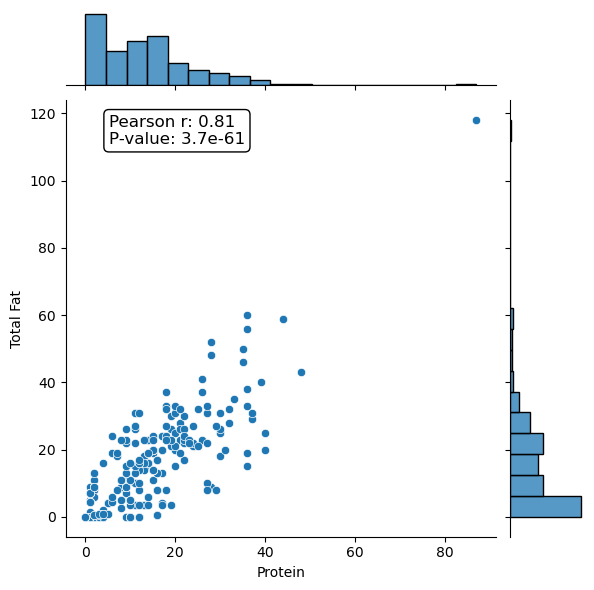

In [69]:
#Showcase relationship utilising graph and scipy package 
from scipy.stats import pearsonr
x = df['Protein']
y = df['Total Fat']

pearson_corr, p_value = pearsonr(x, y)  #get values 

plot = sbs.jointplot(x="Protein", y="Total Fat", data=df) #create graph

plt.annotate(f'Pearson r: {pearson_corr:.2f}\nP-value: {p_value:.2g}', 
             xy=(0.1, 0.9), 
             xycoords='axes fraction', 
             fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

#annotate graph

There is a significant p-value which shows these values are correlated, and judging by the plot this is a positvely skewed correlation

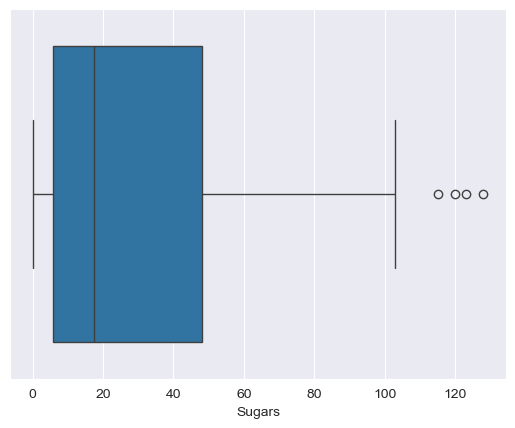

In [72]:
#Boxplot of suger values
plot = sbs.set_style('darkgrid')
ax = sbs.boxplot(x=df["Sugars"])